In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/Admin/Desktop/Tractor-Sales.csv")
df.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [3]:
df.tail(5)

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [4]:
df.shape

(144, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
import warnings
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
%matplotlib inline

In [7]:
df.isna().apply(pd.value_counts).T

,False
Month-Year,144
Number of Tractor Sold,144


In [8]:
dates = pd.date_range(start="2003-01-01",freq='MS',periods=len(df))

In [9]:
len(df)

144

In [10]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [11]:
len(dates)

144

In [12]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [13]:
dates.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)

In [14]:
dates.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', length=144)

In [15]:
import calendar
df['Months'] = dates.month
df['Months'] = df['Months'].apply(lambda x:calendar.month_abbr[x])

In [16]:
df['Year'] = dates.year

In [17]:
df.head()

,Month-Year,Number of Tractor Sold,Months,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [18]:
df.tail()

,Month-Year,Number of Tractor Sold,Months,Year
139,Aug-14,848,Aug,2014
140,Sep-14,640,Sep,2014
141,Oct-14,581,Oct,2014
142,Nov-14,519,Nov,2014
143,Dec-14,605,Dec,2014


In [19]:
df.drop('Month-Year',axis=1,inplace=True)

In [20]:
df.head()

,Number of Tractor Sold,Months,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [21]:
df.rename(columns={"Number of Tractor Sold":"Tractor_Sales"},inplace=True)

In [22]:
df.head()

,Tractor_Sales,Months,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [23]:
df.set_index(dates,inplace=True)

In [24]:
df.tail()

,Tractor_Sales,Months,Year
2014-08-01,848,Aug,2014
2014-09-01,640,Sep,2014
2014-10-01,581,Oct,2014
2014-11-01,519,Nov,2014
2014-12-01,605,Dec,2014


In [25]:
df.columns

Index(['Tractor_Sales', 'Months', 'Year'], dtype='object')

In [26]:
pd.set_option('display.max_rows',None)

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
X = df['Tractor_Sales']
result = adfuller(X)
print('ADF Test Statistic %f'%result[0])
print("p-value %f"%result[1])
print('Critical Values')
for key,value in result[4].items():
  print('\t%s:%.3f'%(key,value))
if result[0]<result[4]["5%"]:
  print('Reject Ho - Time series data is stationary')
else:
  print('Accept Ho - Time series data is non stationary')

ADF Test Statistic 1.108825
p-value 0.995291
Critical Values
	1%:-3.482
	5%:-2.884
	10%:-2.579
Accept Ho - Time series data is non stationary


In [29]:
result[0]

1.1088250591467375

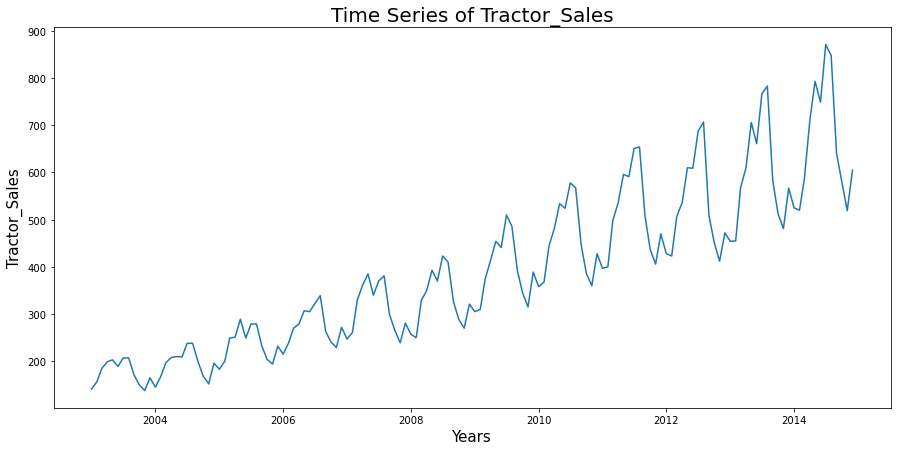

In [30]:
#PLotting the time series data
df_ts = df['Tractor_Sales']
plt.figure(figsize=(15,7))
plt.title('Time Series of Tractor_Sales',fontsize=20)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Tractor_Sales',fontsize=15)
plt.plot(df_ts)
plt.show()

In [31]:
#moving average
roll_mean = df_ts.rolling(window=12).mean()
#Standard Deviation rolling
roll_std = df_ts.rolling(window=12).std()

In [32]:
roll_mean

2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
2003-06-01           NaN
2003-07-01           NaN
2003-08-01           NaN
2003-09-01           NaN
2003-10-01           NaN
2003-11-01           NaN
2003-12-01    176.000000
2004-01-01    176.333333
2004-02-01    177.250000
2004-03-01    178.250000
2004-04-01    179.000000
2004-05-01    179.583333
2004-06-01    181.250000
2004-07-01    183.833333
2004-08-01    186.416667
2004-09-01    188.750000
2004-10-01    190.250000
2004-11-01    191.416667
2004-12-01    194.000000
2005-01-01    197.166667
2005-02-01    199.833333
2005-03-01    204.166667
2005-04-01    207.750000
2005-05-01    214.333333
2005-06-01    217.666667
2005-07-01    221.083333
2005-08-01    224.500000
2005-09-01    227.250000
2005-10-01    230.250000
2005-11-01    233.750000
2005-12-01    236.750000
2006-01-01    239.416667
2006-02-01    242.666667
2006-03-01    244.416667
2006-04-01    246.750000


In [33]:
roll_std

2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
2003-06-01           NaN
2003-07-01           NaN
2003-08-01           NaN
2003-09-01           NaN
2003-10-01           NaN
2003-11-01           NaN
2003-12-01     25.729361
2004-01-01     25.256262
2004-02-01     24.683911
2004-03-01     25.262711
2004-04-01     26.055884
2004-05-01     26.712130
2004-06-01     27.948410
2004-07-01     31.722757
2004-08-01     34.885419
2004-09-01     34.696411
2004-10-01     33.226837
2004-11-01     31.422222
2004-12-01     30.307515
2005-01-01     26.463812
2005-02-01     24.818737
2005-03-01     28.539712
2005-04-01     31.600129
2005-05-01     39.382353
2005-06-01     40.564950
2005-07-01     44.013342
2005-08-01     46.940000
2005-09-01     46.272169
2005-10-01     43.142734
2005-11-01     37.559952
2005-12-01     35.660329
2006-01-01     32.315092
2006-02-01     29.858251
2006-03-01     30.861740
2006-04-01     32.423687


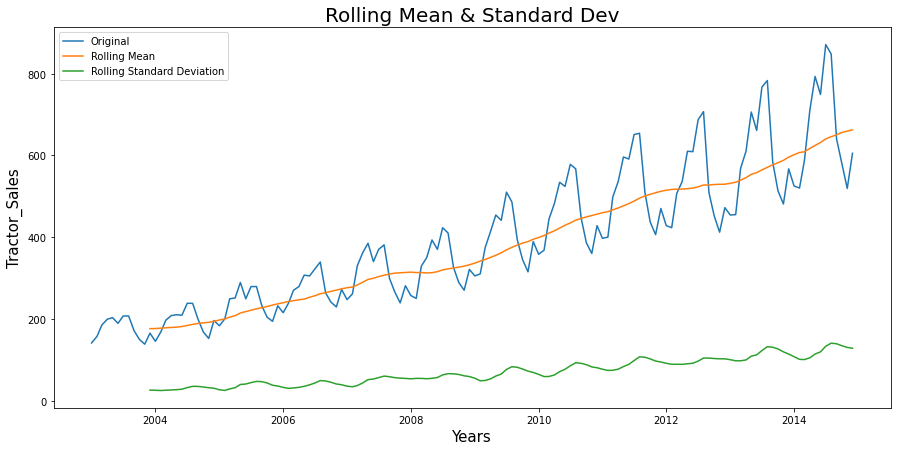

In [34]:
#Plot the upward trend with the help of rolling mean or moving average
plt.figure(figsize=(15,7))
original = plt.plot(df_ts,label="Original")
mean = plt.plot(roll_mean,label='Rolling Mean')
std = plt.plot(roll_std,label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Dev',fontsize=20)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Tractor_Sales',fontsize=15)
plt.show()

In [35]:
monthly_sales = pd.pivot_table(df,values="Tractor_Sales",columns='Year',index='Months')

In [36]:
monthly_sales.to_csv('monthly_sales.csv')

In [37]:
monthly_sales

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Months,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [38]:
monthly_sales = monthly_sales.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [39]:
monthly_sales

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Months,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='Months'>

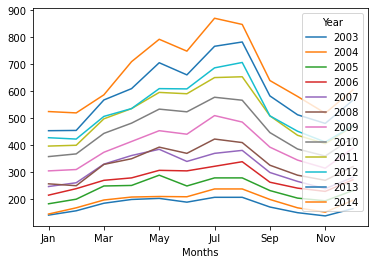

In [40]:
monthly_sales.plot()

In [41]:
yearly_sales = pd.pivot_table(df,values="Tractor_Sales",columns='Months',index='Year')

In [42]:
yearly_sales

Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


In [43]:
yearly_sales = yearly_sales.reindex(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [44]:
yearly_sales

Months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<AxesSubplot:>

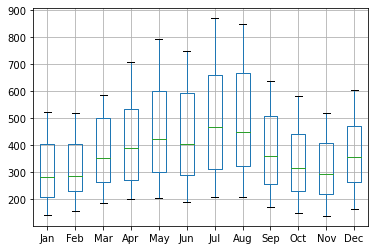

In [45]:
yearly_sales.boxplot()

In [46]:
#Decomposition/Decompose
decomp =  sm.tsa.seasonal_decompose(df_ts,model='multiplicative')

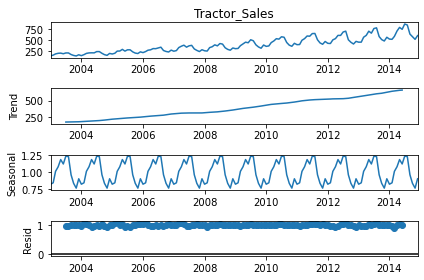

In [47]:
fig = decomp.plot()

In [48]:
#p,d,q parameter
d = q = range(0,2)
p = range(0,4)

In [49]:
pdq = list(itertools.product(p,d,q))

In [50]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1)]

In [51]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

In [52]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12)]

In [53]:
print('ARIMA: {}x{}'.format(pdq[1],seasonal_pdq[1]))

ARIMA: (0, 0, 1)x(0, 0, 1, 12)


In [54]:
warnings.filterwarnings('ignore')

In [55]:
AIC = []
SARIMAX_model = []
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mode = sm.tsa.statespace.SARIMAX(df_ts,order=param,seasonal_order=param_seasonal)
      results = mode.fit()
      print('SARIMAX{}X{}=AIC:{}'.format(param,param_seasonal,results.aic),end='\r')
      AIC.append(results.aic)
      SARIMAX_model.append([param,param_seasonal])
    except:
      continue

In [56]:
mod = sm.tsa.statespace.SARIMAX(df_ts,order=SARIMAX_model[AIC.index(min(AIC))][0],seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],enforce_stationarity=False,enforce_invertibility=False)

In [57]:
results = mod.fit()

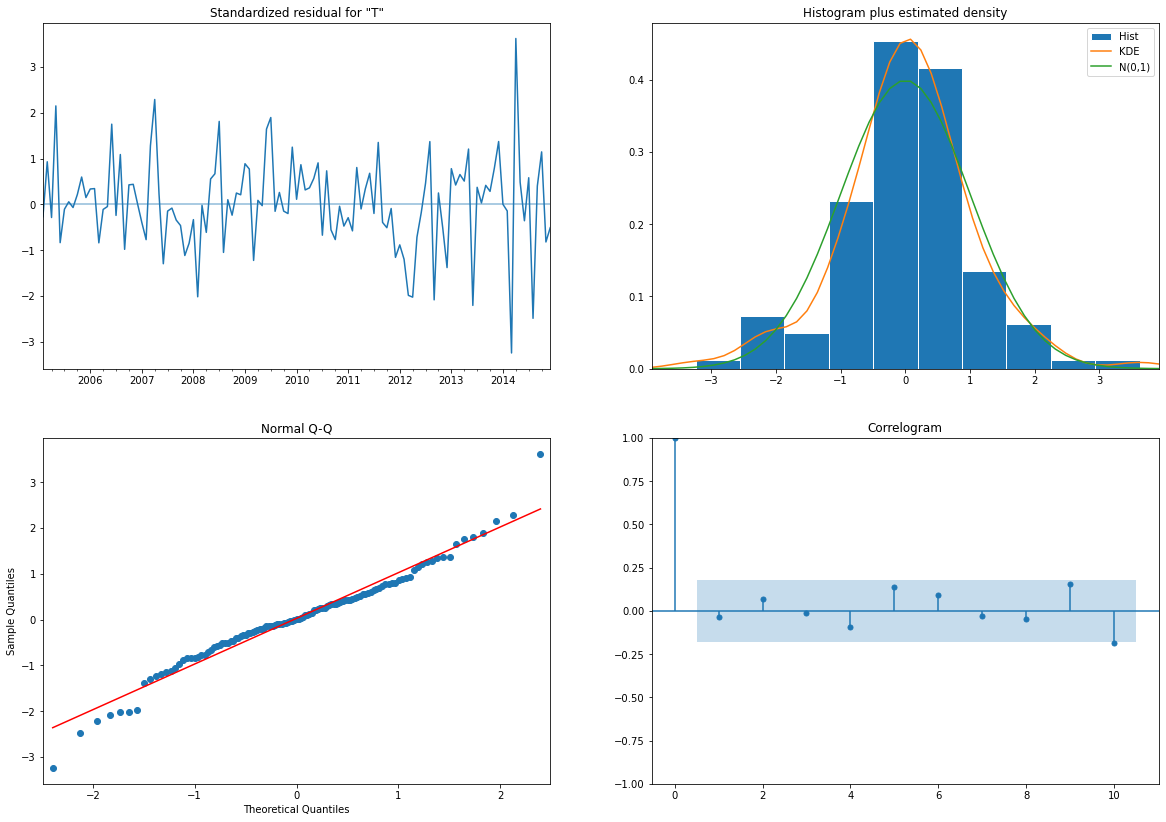

In [58]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [59]:
pred0 = results.get_prediction(start='2003-01-01',dynamic=False)
pred0_cf = pred0.conf_int()

In [60]:
pred0_cf

,lower Tractor_Sales,upper Tractor_Sales
2003-01-01,-1959.963985,1959.963985
2003-02-01,-1831.393999,2088.545394
2003-03-01,-1816.804906,2103.136464
2003-04-01,-1791.272176,2128.669194
2003-05-01,-1778.505766,2141.435603
2003-06-01,-1774.858208,2145.083162
2003-07-01,-1787.624546,2132.316823
2003-08-01,-1771.210702,2148.730668
2003-09-01,-1771.210662,2148.730707
2003-10-01,-1804.038413,2115.902957


In [61]:
pred1 = results.get_prediction(start='2003-01-01',dynamic=True)
pred1_ci = pred1.conf_int()

In [62]:
pred1_ci

,lower Tractor_Sales,upper Tractor_Sales
2003-01-01,-1959.963985,1959.963985
2003-02-01,-2652.504754,2652.504754
2003-03-01,-3113.190237,3113.190237
2003-04-01,-3449.731647,3449.731647
2003-05-01,-3706.379835,3706.379835
2003-06-01,-3906.974245,3906.974245
2003-07-01,-4066.246677,4066.246677
2003-08-01,-4194.083670,4194.083670
2003-09-01,-4297.489579,4297.489579
2003-10-01,-4381.617091,4381.617091


In [63]:
pred2 = results.get_forecast('2024-01-01')
pred2_ci = pred2.conf_int()

In [64]:
pred2_ci

,lower Tractor_Sales,upper Tractor_Sales
2015-01-01,541.767665,602.434195
2015-02-01,535.742370,603.460599
2015-03-01,631.196322,704.261847
2015-04-01,738.740205,815.970766
2015-05-01,839.365465,919.895519
2015-06-01,784.457245,867.631325
2015-07-01,918.987971,1004.298269
2015-08-01,907.369638,994.416359
2015-09-01,671.304576,759.769239
2015-10-01,597.578334,687.204984


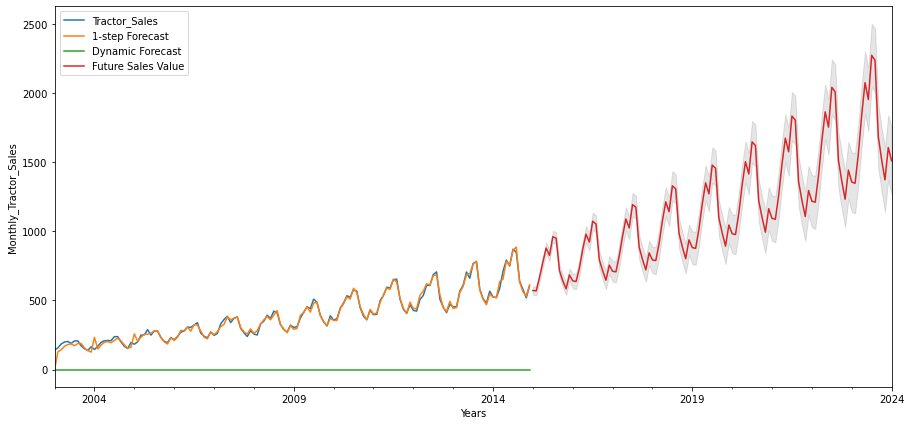

In [65]:
ax = df_ts.plot(figsize=(15,7))
pred0.predicted_mean.plot(ax=ax,label='1-step Forecast')
pred1.predicted_mean.plot(ax=ax,label='Dynamic Forecast')
pred2.predicted_mean.plot(ax=ax,label='Future Sales Value')
ax.fill_between(pred2_ci.index,pred2_ci.iloc[:,0],pred2_ci.iloc[:,1],color='k',alpha=.1)
plt.xlabel('Years')
plt.ylabel('Monthly_Tractor_Sales')
plt.legend()
plt.show()